# Más Allá de la Etiqueta 
### Analísis sobre Precios y Regiones Vinícolas

"En este análisis exploratorio de datos (EDA), examinaremos la información disponible sobre vinos españoles para identificar patrones relevantes relacionados con sus características y precios. Prestaremos especial atención a las denominaciones de origen (D.O.) y las regiones, buscando comprender cómo estos factores podrían influir en el mercado vinícola. Además, exploraremos potenciales oportunidades en regiones menos reconocidas para aportar perspectivas útiles y fundamentadas."

## Hipotesis Principal

### La relación calidad-precio es el principal factor que influye en las calificaciones y reseñas positivas de los vinos en España.

### Hipotesis secundarias

Hipotesis 2 : Los vinos provenientes de ciertas regiones específicas de España (por ejemplo, La Rioja o Ribera del Duero) tienden a recibir mejores calificaciones debido a su reputación histórica y calidad percibida.


Hipotesis 3 : Los vinos de regiones menos conocidas pueden destacar por su autenticidad y una buena relación calidad-precio.


Hipotesis 4 : Los vinos de bodegas más reconocidas obtienen mejores calificaciones, independientemente del precio.

hipotesis 5 : el equilibrio entre acidez y cuerpo en un vino suele asociarse con mejores valoraciones y precios más altos.



#### Interrogantes que motivan nuestro EDA

- Influye el nombre de una bodega, en la idea que tienen las personas sobre la calidad  un vino?

- Influye el precio de una botella de vino en la valoracion que puede tener el consumidor?

- Influye quizás la zona de donde proviene el vino o la uva en el precio de la botella o esta relacionado auténticamente con los costes de produccion? es solo fama?

- La milla de oro del vino español tiene garantizado un mercado, solo por ser la milla de oro ?

- El precio del mercado, lo famoso que es el nombre del vino, las reseñas que tiene, el precio que tiene y si ese     precio es barato o caro; permite a la población conocer el vino  o hacerlo mas exclusivo?

- La reputación de ciertas regiones vinícolas en España mejora la percepción de calidad, influye en el etiquetado y estimula la creación de más marcas de vino

- se consume mas vino con los años?

- se consume mas vino por meses o por época del año?

- se consume mas vino los dias de semana, fines de semana o por horas del dia? comida o cena



In [163]:
pip install statsmodels


^C
Note: you may need to restart the kernel to use updated packages.


In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [36]:
vinos_espana= pd.read_csv("wines_SPA.csv", sep = ",")
#fuente_1 = "https://www.kaggle.com/code/sasakitetsuya/spanish-wine-analysis-clustering-wine-map"

consumo_espana= pd.read_csv("totales_vino_y_otros.csv", sep = ";")
#fuente_2 = "https://datos.gob.es/en/catalogo?q=informe_consumo_nacional_datos_noviembre_2024"

consumo_semanal = pd.read_csv('bebidas_c_semanal.csv', sep = ";")
#fuente_3 = "https://datos.gob.es/en/catalogo?q=informe_bebidas_alcoholicas"

In [37]:
# Dataset de vinos españoles 

vinos_espana.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [ ]:
# Obtengo el numero de filas y  de las columnas que componen el DataSet
vinos_espana.shape

(7500, 11)

In [ ]:
# Obtengo los nombres de las columnas
vinos_espana.columns

Index(['winery', 'wine', 'year', 'rating', 'num_reviews', 'country', 'region',
       'price', 'type', 'body', 'acidity'],
      dtype='object')

In [ ]:
# Paso los nombres de las regiones de produccuion de vino en Eapaña 
vinos_espana['region'] = vinos_espana['region'].str.lower()


In [ ]:
# Relleno los valores faltantes en la columna 'type' con los de la columna 'región'
vinos_espana['type'] = vinos_espana['type'].fillna(vinos_espana['region'])

# Relleno valores faltantes con la media de la misma región
vinos_espana['body'] = vinos_espana.groupby('region')['body'].transform(lambda x: x.fillna(x.mean()))
vinos_espana['acidity'] = vinos_espana.groupby('region')['acidity'].transform(lambda x: x.fillna(x.mean()))

# Elimino filas con al menos un valor nulo
vinos_espana = vinos_espana.dropna()
vinos_espana = vinos_espana.drop_duplicates()
# Verifico si quedan valores nulos
print(vinos_espana.isnull().sum())




winery               0
wine                 0
year                 0
rating               0
num_reviews          0
country              0
region               0
price                0
type                 0
body                 0
acidity              0
recognized_winery    0
dtype: int64


In [ ]:
# Filtro los vinos con precio hasta 100 euros para nuestro estudio 
vinos_hasta_100 = vinos_espana[vinos_espana["price"] <= 100]
# Filtro los vinos con precio desde 100 euros para nuestro estudio
vinos_desde_100 = vinos_espana[vinos_espana["price"] >= 100]

# Creo dos nuevos Dataframes a partir del original
vinos_hasta_100 = vinos_hasta_100.copy()
vinos_desde_100 = vinos_desde_100.copy()



## Trabajando con dataset "vinos_espana"

In [ ]:
#1. Resumen estadístico de "vinos_hasta_100"
vinos_hasta_100.describe()


,rating,num_reviews,price,body,acidity
count,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000
mean,4.354478,625.285617,44.922240,4.182209,2.947571
std,0.110099,1484.102948,22.716951,0.667716,0.260775
min,4.200000,25.000000,4.990000,2.000000,1.000000
25%,4.300000,59.250000,27.145000,4.000000,3.000000
50%,4.300000,162.500000,38.795000,4.000000,3.000000
75%,4.400000,558.750000,59.950000,5.000000,3.000000
max,4.700000,32624.000000,100.000000,5.000000,3.000000


In [ ]:
#1. Resumen estadístico de "vinos_desde_100"
vinos_desde_100.describe()

,rating,num_reviews,price,body,acidity
count,539.000000,539.000000,539.000000,539.000000,539.000000
mean,4.532839,429.847866,388.421359,4.423082,2.865861
std,0.156333,931.755967,439.288166,0.579752,0.440469
min,4.200000,25.000000,100.000000,2.000000,1.000000
25%,4.400000,56.000000,140.000000,4.000000,3.000000
50%,4.500000,111.000000,205.000000,4.000000,3.000000
75%,4.700000,266.000000,383.075000,5.000000,3.000000
max,4.900000,6803.000000,3119.080000,5.000000,3.000000


In [ ]:
#2. Análisis de correlaciones en "vinos_hasta_100" (entre'price', 'rating', 'body', 'acidity').
correlaciones_hasta_100 = vinos_hasta_100[['price', 'rating', 'body', 'acidity']].corr()
correlaciones_hasta_100

,price,rating,body,acidity
price,1.000000,0.428000,0.030962,-0.019707
rating,0.428000,1.000000,0.061335,-0.041976
body,0.030962,0.061335,1.000000,-0.061458
acidity,-0.019707,-0.041976,-0.061458,1.000000


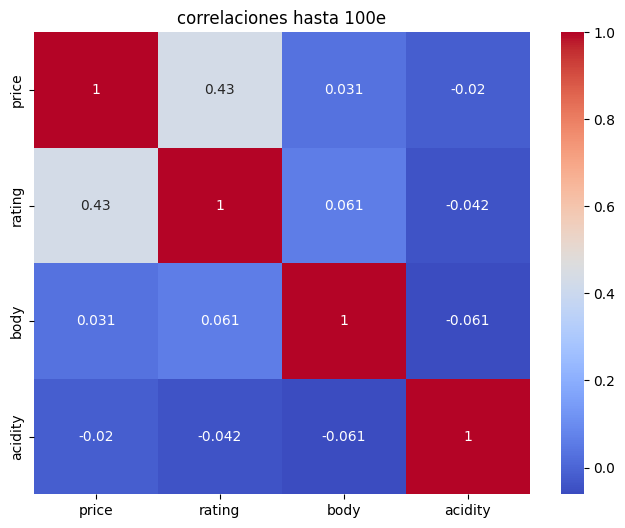

In [ ]:
# Mapa de correlaciones en "vinos_hasta_100" (entre'price', 'rating', 'body', 'acidity').
plt.figure(figsize=(8, 6))
sns.heatmap(correlaciones_hasta_100, annot=True, cmap='coolwarm')
plt.title('correlaciones hasta 100e')
plt.show()

In [165]:
#2. Análisis de correlaciones en "vinos_desde_100" (entre'price', 'rating', 'body', 'acidity').
correlaciones_desde_100 = vinos_desde_100[['price', 'rating', 'body', 'acidity']].corr()
correlaciones_desde_100

,price,rating,body,acidity
price,1.000000,0.416155,0.184866,0.099087
rating,0.416155,1.000000,0.317916,-0.055790
body,0.184866,0.317916,1.000000,-0.083197
acidity,0.099087,-0.055790,-0.083197,1.000000


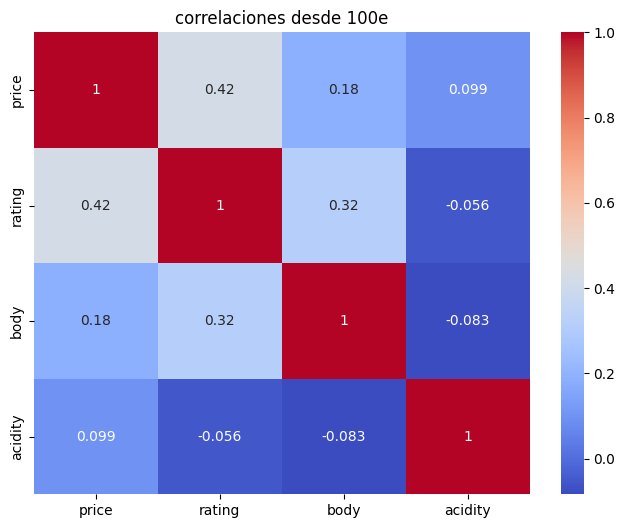

In [ ]:
#Mapa de correlacion en "vinos_desde_100" (entre'price', 'rating', 'body', 'acidity').
plt.figure(figsize=(8, 6))
sns.heatmap(correlaciones_desde_100, annot=True, cmap='coolwarm')
plt.title('correlaciones desde 100e')
plt.show()

In [ ]:
# 3. Agrupo por regiones en "vinos_hasta_100"
#calificaciones (rating) y (price) por (region) para validar hipótesis sobre regiones conocidas y menos conocidas.

regiones_hasta_100 = vinos_hasta_100.groupby('region')[['rating', 'price']].mean()
regiones_hasta_100.head()

,rating,price
region,,
alella,4.325000,19.097500
alicante,4.357143,33.772857
almansa,4.314286,17.555714
andalucia,4.325000,41.062500
aragon,4.300000,21.020000


In [ ]:
# 3. Agrupo por regiones en "vinos_desde_100"
#calificaciones (rating) y (price) por (region) para validar hipótesis sobre regiones conocidas y menos conocidas.
regiones_desde_100 = vinos_desde_100.groupby('region')[['rating', 'price']].mean()
regiones_desde_100.head()

,rating,price
region,,
aragon,4.400000,195.990000
arinzano,4.300000,112.760000
bierzo,4.557143,889.144286
campo de borja,4.575000,112.675000
castilla y leon,4.450000,161.390000


In [ ]:
#2. Análisis de correlaciones en "regiones_hasta_100" (entre'price' y 'rating').
correlacion = regiones_hasta_100['rating'].corr(regiones_hasta_100['price'])
print("Correlación entre rating y precio(en regiones con vinos con valor de hasta 100 euros):",correlacion)

Correlación entre rating y precio(en regiones con vinos con valor de hasta 100 euros): 0.186419071541741


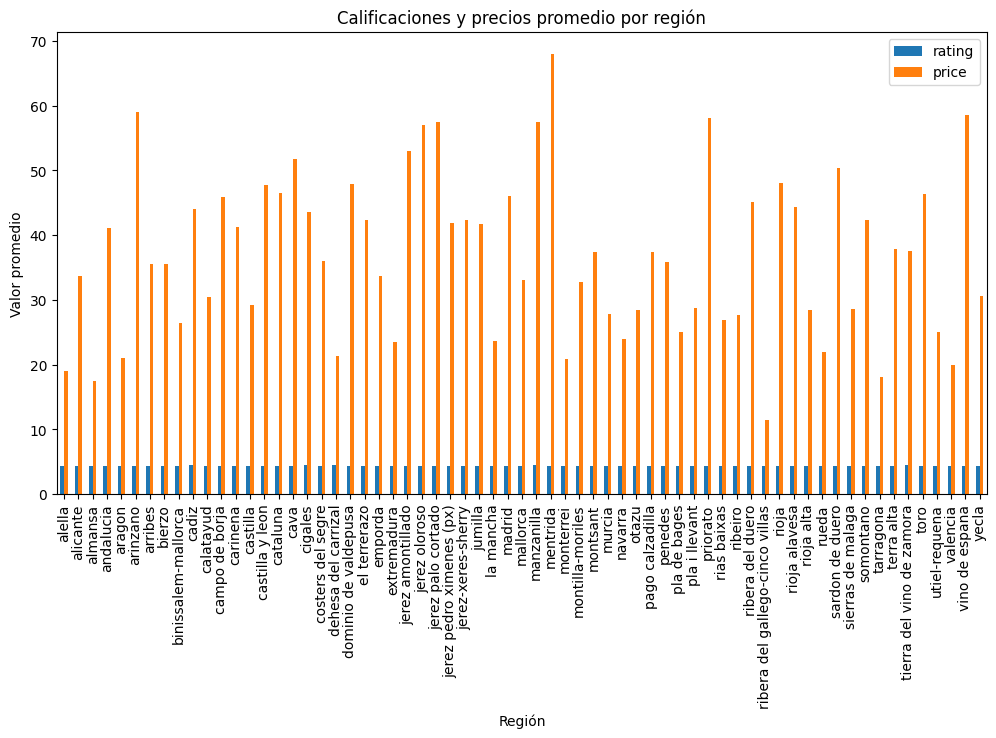

In [153]:
# gráfico de barras
regiones_hasta_100.plot(kind='bar', figsize=(12, 6))
plt.title('Calificaciones y precios promedio por región')
plt.ylabel('Valor promedio')
plt.xlabel('Región')
plt.show()

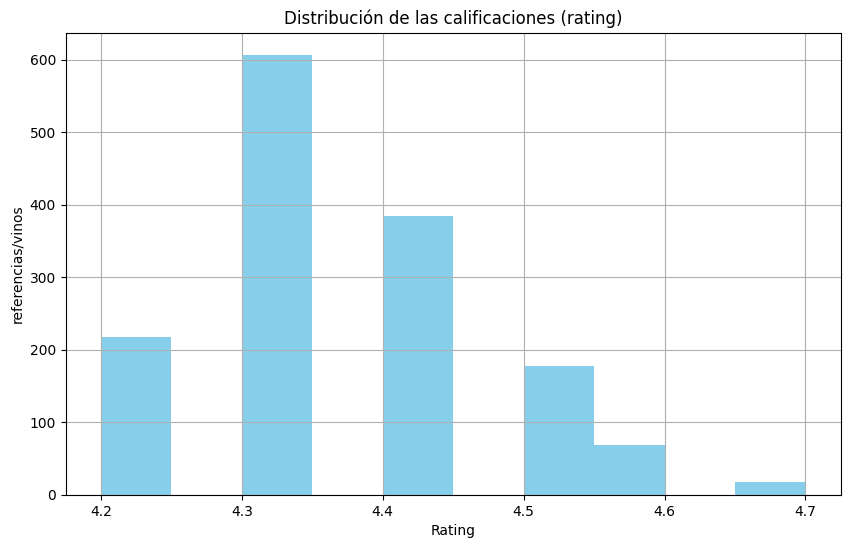

In [ ]:
vinos_hasta_100['rating'].hist(bins=10, color='skyblue', figsize=(10, 6))
plt.title('Distribución de las calificaciones (rating)')
plt.xlabel('Rating')
plt.ylabel('referencias/vinos')
plt.show()


In [ ]:
correlaciones = vinos_hasta_100[['rating', 'price', 'body', 'acidity']].corr()
print(correlaciones)

           rating     price      body   acidity
rating   1.000000  0.428000  0.061335 -0.041976
price    0.428000  1.000000  0.030962 -0.019707
body     0.061335  0.030962  1.000000 -0.061458
acidity -0.041976 -0.019707 -0.061458  1.000000


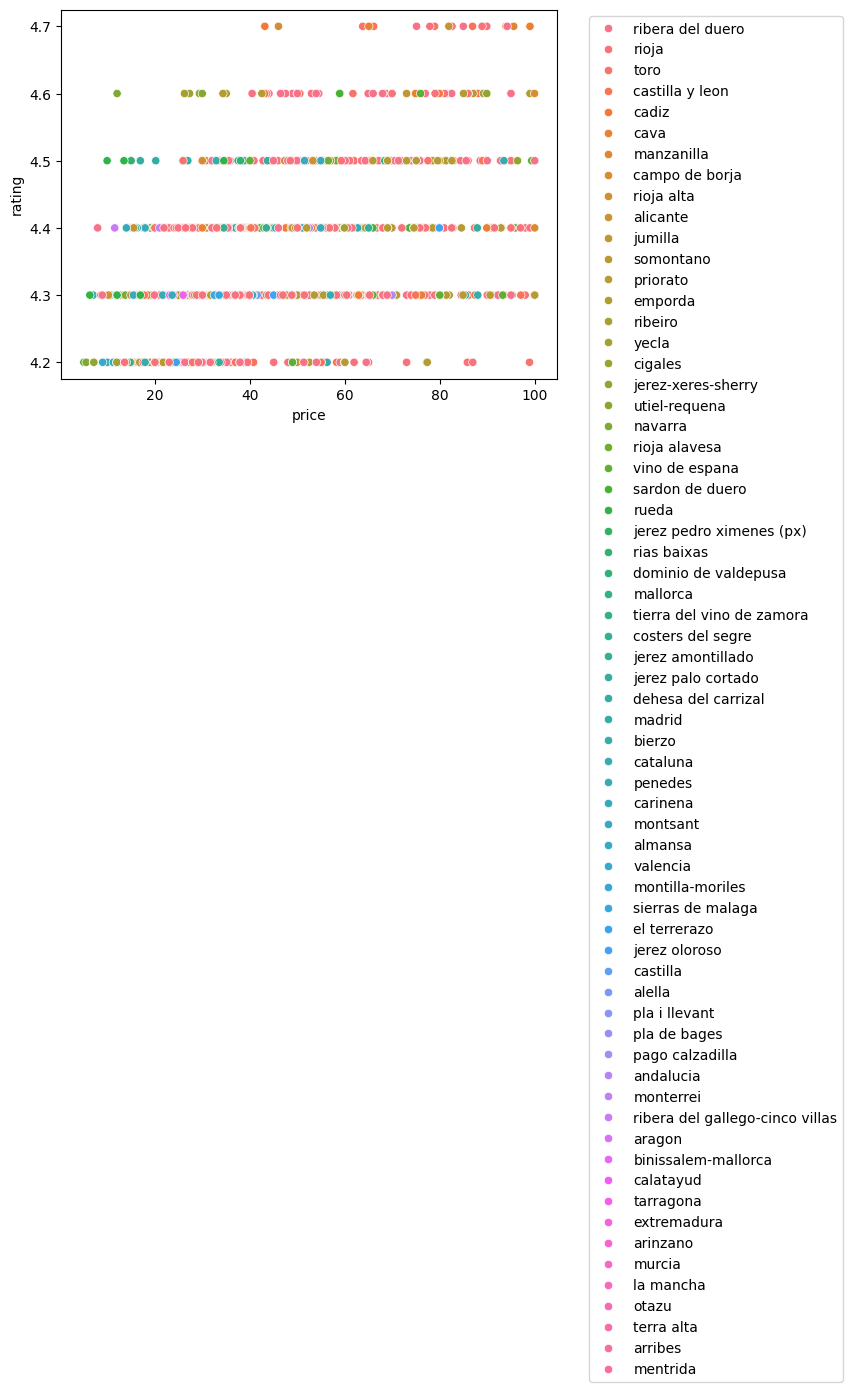

In [170]:
# 4. Relación calidad-precio
    #Examina cómo 'price' afecta las calificaciones ('rating'). Un gráfico de dispersión será útil aquí:

sns.scatterplot(data=vinos_hasta_100, x='price', y='rating', hue='region')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [ ]:
# 5. Evaluación de bodegas reconocidas
    #Datos por 'winery' , (rating) y (num_reviews). 
    #Entender si las bodegas conocidas tienen mejores valoraciones.

promedios_bodega = vinos_espana.groupby('winery')[['rating', 'num_reviews']].mean().sort_values('rating', ascending=False)
promedios_bodega.head(10)  # Las 10 bodegas con mejores calificaciones

,rating,num_reviews
winery,,
Barbadillo,4.700000,58.000000
Vega Sicilia,4.670833,1096.270833
Finca Moncloa,4.650000,64.500000
Bodegas El Nido,4.607692,1123.923077
Micro Bio (MicroBio),4.600000,33.000000
Dominio de Calogia,4.600000,114.000000
La Legua,4.600000,47.000000
Alvear,4.600000,106.500000
Bodegas Yuste,4.600000,46.000000


In [ ]:
#Para vinos con valor de hasta 100 euros

# Agrupo los datos por 'winery' y calcula las calificaciones promedio y número de reseñas
promedios_bodega = vinos_hasta_100.groupby('winery')[['rating', 'num_reviews']].mean()

# Ordeno por el número de reseñas en orden descendente
promedios_bodega = promedios_bodega.sort_values('num_reviews', ascending=False)

# Muestro las 10 bodegas con más reseñas
promedios_bodega.head(10)


,rating,num_reviews
winery,,
Felix Solis,4.200000,32624.000000
Dominio de Pingus,4.250000,4185.500000
Pintia,4.400000,4127.300000
Alion,4.487500,3674.750000
La Rioja Alta,4.300000,3500.954545
El Coto,4.200000,3462.000000
Pago de Carraovejas,4.514286,3023.428571
R. Lopez de Heredia,4.262500,2195.000000
Bodegas El Nido,4.483333,2053.166667


In [ ]:
# Agrupo los datos por 'winery' y calcula las calificaciones promedio y número de reseñas
promedios_bodega = vinos_desde_100.groupby('winery')[['rating', 'num_reviews']].mean()
# Número de reseñas en orden descendente
promedios_bodega = promedios_bodega.sort_values('num_reviews', ascending=False)
promedios_bodega.head(10)

,rating,num_reviews
winery,,
Aalto,4.550000,3120.500000
Bodegas San Roman,4.300000,1824.000000
Pago de Carraovejas,4.700000,1611.500000
Alion,4.425000,1574.750000
Benjamin de Rothschild - Vega Sicilia,4.400000,1519.000000
Marques de Vargas,4.400000,1326.000000
Vega Sicilia,4.670833,1096.270833
Bodegas Mauro,4.400000,1064.000000
Hacienda Monasterio,4.400000,927.000000


In [ ]:
# Calculo los percentiles
q75_reviews = vinos_hasta_100["num_reviews"].quantile(0.75)
q25_reviews = vinos_hasta_100["num_reviews"].quantile(0.25)
q75_rating = vinos_hasta_100["rating"].quantile(0.75)
q25_rating = vinos_hasta_100["rating"].quantile(0.25)

# Agrupo bodegas más y menos famosas
mas_famosas = vinos_hasta_100[(vinos_hasta_100["num_reviews"] >= q75_reviews) & (vinos_hasta_100["rating"] >= q75_rating)]

menos_famosas = vinos_hasta_100[(vinos_hasta_100["num_reviews"] <= q25_reviews) & (vinos_hasta_100["rating"] <= q25_rating)]

# promedio de valoración para comparación
promedio_mas_famosas = mas_famosas["rating"].mean()
promedio_menos_famosas = menos_famosas["rating"].mean()

# Resultados
#print("Bodegas más famosas:")
#print(mas_famosas)
#print("\nBodegas menos famosas:")
#print(menos_famosas)
print("\nPromedio de rating - Más famosas:", promedio_mas_famosas)
print("Promedio de rating - Menos famosas:", promedio_menos_famosas)

# Interpretación
if promedio_mas_famosas > promedio_menos_famosas:
    print("Las bodegas más famosas tienden a tener mejores ratings.")
else:
    print("Las bodegas más famosas no siempre tienen mejores ratings.")


Promedio de rating - Más famosas: 4.438260869565216
Promedio de rating - Menos famosas: 4.3
Las bodegas más famosas tienden a tener mejores ratings.


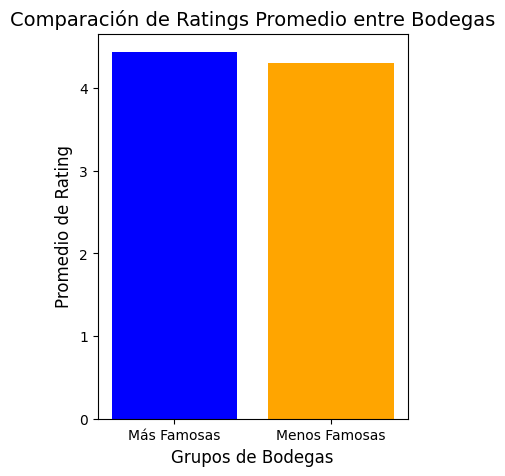

In [134]:
grupos = {
    "Fama": ["Más Famosas", "Menos Famosas"],
    "Promedio Rating": [promedio_mas_famosas, promedio_menos_famosas],
}
resultados = pd.DataFrame(grupos)

# gráfico de barras
plt.figure(figsize=(4,5))
plt.bar(resultados["Fama"], resultados["Promedio Rating"], color=["blue", "orange"])
plt.title("Comparación de Ratings Promedio entre Bodegas", fontsize=14)
plt.xlabel("Grupos de Bodegas", fontsize=12)
plt.ylabel("Promedio de Rating", fontsize=12)

plt.show()


Hipótesis 5: Acidez y cuerpo

Gráfico de dispersión:


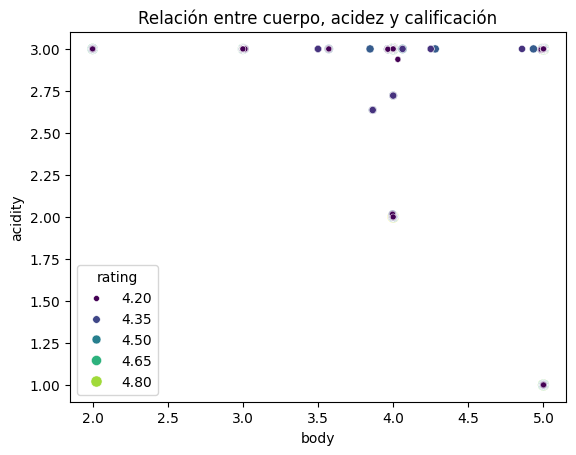

In [ ]:
# Relación entre 'body', 'acidity' y 'rating'.

sns.scatterplot(data=vinos_espana, x='body', y='acidity', size='rating', hue='rating', palette='viridis')
plt.title('Relación entre cuerpo, acidez y calificación')
plt.show()


1. Histogramas para "rating" y "price" para analizar la distribución

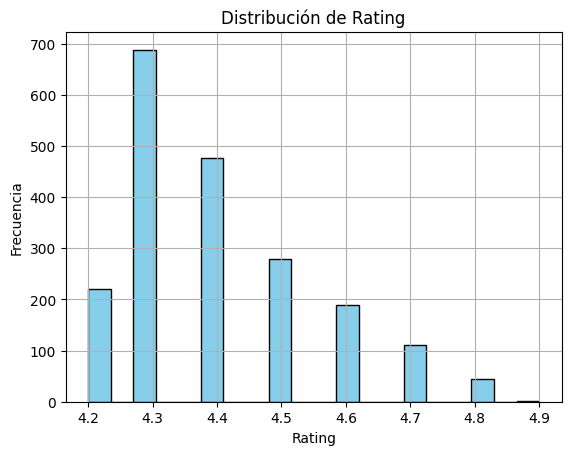

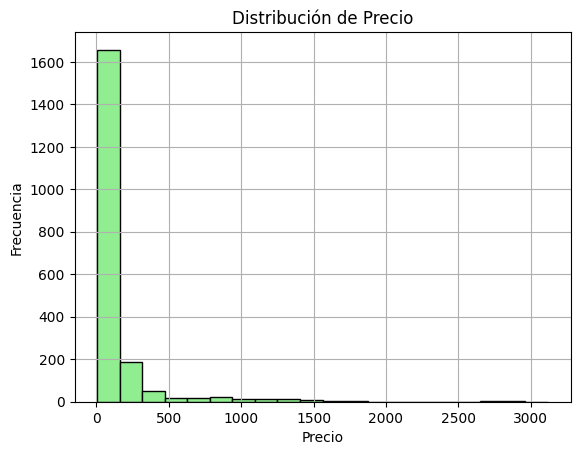

In [53]:
import matplotlib.pyplot as plt

# Histograma para rating
vinos_espana['rating'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Rating')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.show()

# Histograma para price
vinos_espana['price'].hist(bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribución de Precio')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

Hipótesis 1: Relación calidad-precio

Gráfico de dispersión

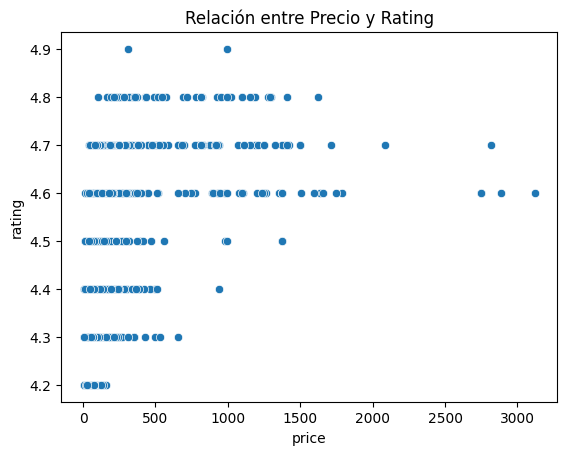

In [ ]:


sns.scatterplot(x="price", y="rating", data=vinos_espana)
plt.title("Relación entre Precio y Rating")
plt.show()


Correlación: Calcula el coeficiente de correlación:


In [70]:
correlacion = vinos_espana["price"].corr(vinos_espana["rating"])
print("Correlación:", correlacion)


Correlación: 0.5070492398404325


Hipótesis 2: Regiones específicas

Agrupación:

In [147]:
region_means = vinos_espana.groupby("region")["rating"].mean()
# Comparación: Selecciona regiones como "La Rioja" y "Ribera del Duero" y compáralas con otras
famous_regions = vinos_espana[vinos_espana["region"].isin(["La Rioja", "Ribera del Duero"])]
print(famous_regions["rating"].mean())



nan


Hipótesis 3: Regiones menos conocidas

Identificar regiones menos frecuentes:


In [144]:
region_counts = vinos_espana["region"].value_counts()
regiones_desconocidas = region_counts[region_counts < 20].index
regiones_desconocidas

Index(['mallorca', 'rueda', 'campo de borja', 'somontano', 'rioja alta',
       'alicante', 'costers del segre', 'jerez amontillado', 'ribeiro',
       'jerez palo cortado', 'navarra', 'valencia', 'cataluna', 'castilla',
       'yecla', 'utiel-requena', 'rioja alavesa', 'cadiz', 'almansa',
       'jerez pedro ximenes (px)', 'conca de barbera', 'sierras de malaga',
       'pla de bages', 'jerez oloroso', 'dominio de valdepusa', 'alella',
       'andalucia', 'manzanilla', 'mentrida', 'dehesa del carrizal',
       'el terrerazo', 'carinena', 'arinzano', 'madrid', 'cigales',
       'pla i llevant', 'extremadura', 'aragon', 'calatayud', 'la mancha',
       'tarragona', 'pago calzadilla', 'tierra del vino de zamora',
       'binissalem-mallorca', 'monterrei', 'ribera del gallego-cinco villas',
       'murcia', 'otazu', 'terra alta', 'arribes'],
      dtype='object', name='region')

In [146]:
#Comparar medias:
desconocidas = vinos_espana[vinos_espana["region"].isin(regiones_desconocidas)]
print(desconocidas["rating"].mean(), desconocidas["price"].mean())


4.367774086378737 53.717618953869724


Hipótesis 4: Bodegas reconocidas

Agrupar por bodega:

In [159]:
bodegas = vinos_espana.groupby("winery").agg({"num_reviews": "sum", "rating": "mean"})
# Ordenar por 'num_reviews' y 'rating' en orden descendente
bodegas = bodegas.sort_values(by=["num_reviews", "rating"], ascending=[False, False])
# umbral del percentil 75 para num_reviews
threshold = bodegas["num_reviews"].quantile(0.75)
bodegas.head(5)

,num_reviews,rating
winery,,
Vega Sicilia,105242,4.670833
La Rioja Alta,84044,4.352778
Pintia,44832,4.371429
Alion,41996,4.456250
Dominio de Pingus,39851,4.545161


In [ ]:
#Identificar las bodegas más reconocidas
# Cree una columna binaria para identificar bodegas reconocidas
bodegas["recognized_winery"] = bodegas["num_reviews"] > threshold


<Figure size 800x600 with 0 Axes>

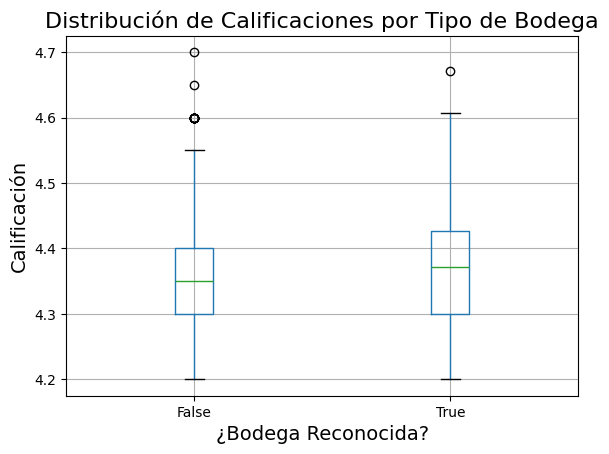

In [162]:
# gráfico de caja
plt.figure(figsize=(8, 6))
bodegas.boxplot(column='rating', by='recognized_winery', grid=False)

plt.title('Distribución de Calificaciones por Tipo de Bodega', fontsize=16)
plt.suptitle('')  # Eliminar el título automático
plt.xlabel('¿Bodega Reconocida?', fontsize=14)
plt.ylabel('Calificación', fontsize=14)
plt.grid(True)
plt.show()
